# **Digit Recognition**

## **Importing Basic Libraries**

In [1]:
import numpy as np #to perform array operations
from sklearn.datasets import load_digits #loading the built-in dataset

## **Load Dataset**

In [2]:
dataset = load_digits()
print(dataset)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

## **Dataset Summarization**

In [12]:
print(dataset.data)
print(dataset.target)

print(dataset.data.shape)
print(dataset.images.shape)

dataImageLength = len(dataset.images)
print(dataImageLength)


[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
(1797, 64)
(1797, 8, 8)
1797


## **Dataset Visualization**

<Figure size 640x480 with 0 Axes>

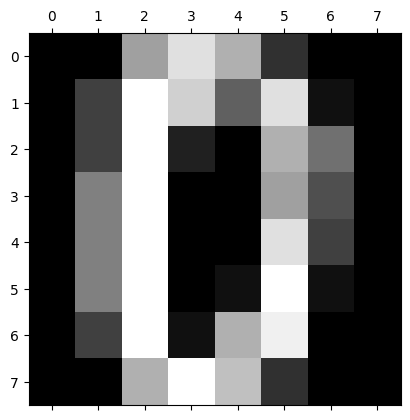

[[ 0.  0. 10. 14. 11.  3.  0.  0.]
 [ 0.  4. 16. 13.  6. 14.  1.  0.]
 [ 0.  4. 16.  2.  0. 11.  7.  0.]
 [ 0.  8. 16.  0.  0. 10.  5.  0.]
 [ 0.  8. 16.  0.  0. 14.  4.  0.]
 [ 0.  8. 16.  0.  1. 16.  1.  0.]
 [ 0.  4. 16.  1. 11. 15.  0.  0.]
 [ 0.  0. 11. 16. 12.  3.  0.  0.]]


In [4]:
n = 30

import matplotlib.pyplot as plt #data visulaization
plt.gray()
plt.matshow(dataset.images[n])
plt.show()

print(dataset.images[n])

## **Segregating Dataset into Input and Output**

In [5]:
x = dataset.images.reshape((dataImageLength,-1))
print(x)

y = dataset.target
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


## **Splitting Dataset for Training and Testing**



In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
print(x_train.shape)
print(x_test.shape)

(1347, 64)
(450, 64)


## **Model Training**

In [7]:
from sklearn import svm
model = svm.SVC(gamma = 0.001)
model.fit(x_train, y_train)

SVC(gamma=0.001)

## **Test Data Prediction**

In [8]:
y_pred = model.predict(x_test)

## **Model Evaluation**

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

print("Accuracy of the model : {0}".format(accuracy_score(y_test, y_pred)*100))

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  0  0  0  0  0  0  0 48  0]
 [ 0  0  0  0  0  1  0  0  0 46]]
Accuracy of the model : 99.55555555555556


## **Predicting Digit from the Test Data**

[5]




<ipython-input-10-9fc93a446740>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title('%i' %result)


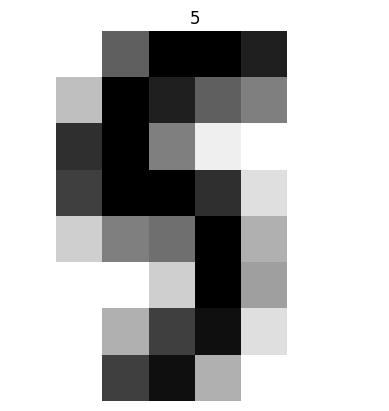

In [10]:
n = 1568

result = model.predict(dataset.images[n].reshape(1,-1))
plt.imshow(dataset.images[n], cmap=plt.cm.gray_r, interpolation = 'nearest')
print(result)
print("\n")
plt.axis('off')
plt.title('%i' %result)
plt.show()

## **Validating Some ML Algorithm by its MOdel-Accuracy score**

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [21]:
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', svm.SVC(gamma=0.001)))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier()))
print(models)

[('LDA', LinearDiscriminantAnalysis()), ('LR', LogisticRegression()), ('KNN', KNeighborsClassifier()), ('SVM', SVC(gamma=0.001)), ('NB', GaussianNB()), ('CART', DecisionTreeClassifier())]


LDA : 0.917070


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR : 0.928194
KNN : 0.971629
SVM : 0.978293
NB : 0.811390
CART : 0.824153


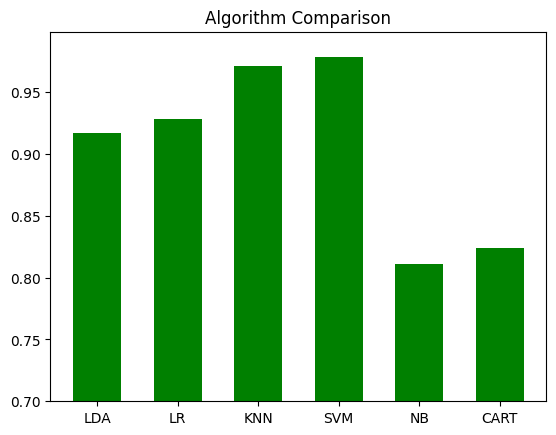

In [25]:
results = []
names = []
res = []

#input and output
x = dataset.images.reshape((dataImageLength, -1))
y = dataset.target

for name, model in models:
  skfold = StratifiedKFold(n_splits=10)
  cv_results = cross_val_score(model, x, y, cv = skfold, scoring = 'accuracy')
  results.append(cv_results)
  names.append(name)
  res.append(cv_results.mean())
  print('%s : %f' % (name, cv_results.mean()))

plt.ylim(.700, .999)
plt.bar(names, res, color = 'green', width = 0.6 )

plt.title("Algorithm Comparison")
plt.show()